# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el *performance* del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [74]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [75]:
df=pd.read_csv('./data/Advertising.csv', index_col='Unnamed: 0')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [77]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14022.500000
std,85.854236,14.846809,21.778621,5217.456566
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,10375.000000
50%,149.750000,22.900000,25.750000,12900.000000
75%,218.825000,36.525000,45.100000,17400.000000
max,296.400000,49.600000,114.000000,27000.000000


In [78]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


- Target: Sales

## Exploratory Data Analysis 

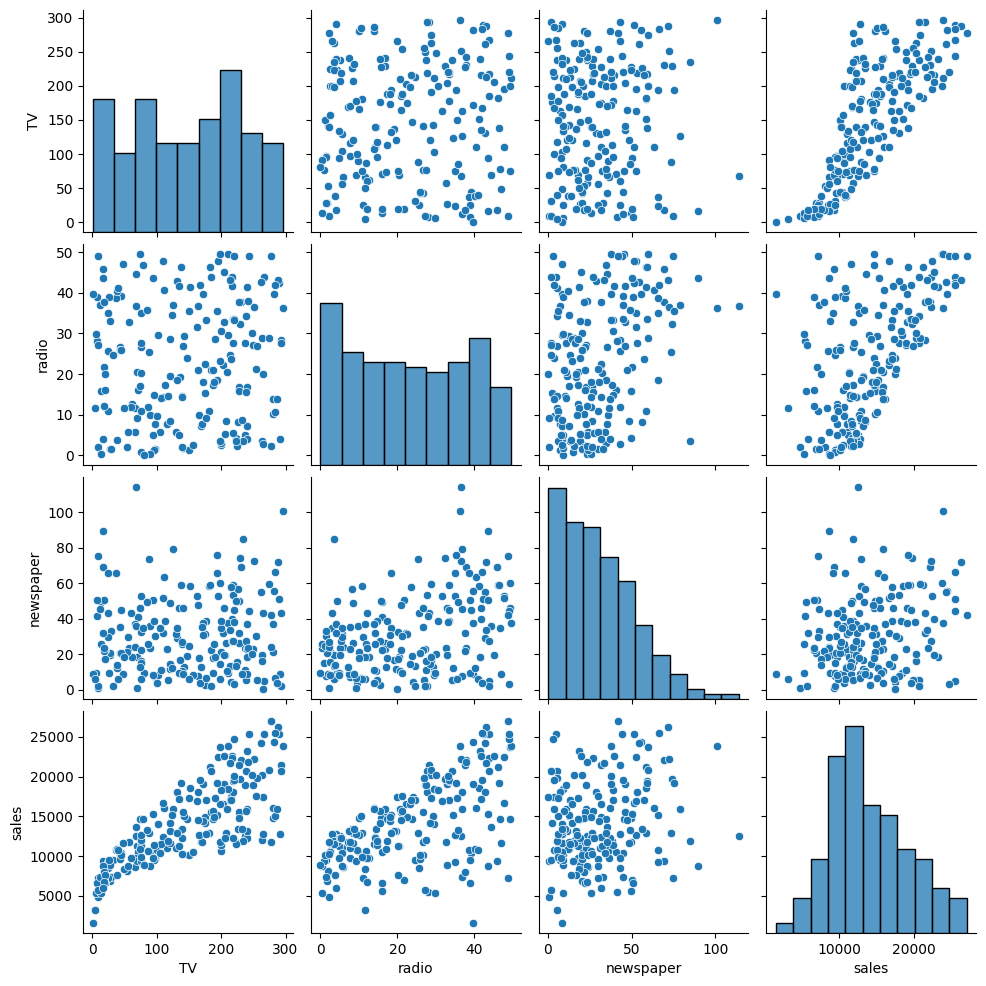

In [79]:
sns.pairplot(df);

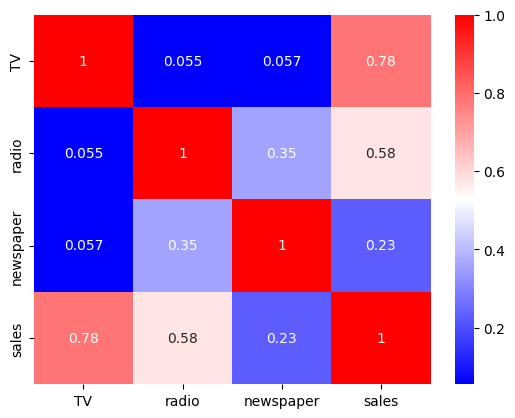

In [80]:
sns.heatmap(df.corr(),
            cmap='bwr',
            annot=True);

- En principio el que mas relacion tiene con la variable objetivo (target) es 'TV'. Tanto 'TV' como 'Radio' parecen presentan una relacion lineal positiva con la variable objetivo. Graficandolos:

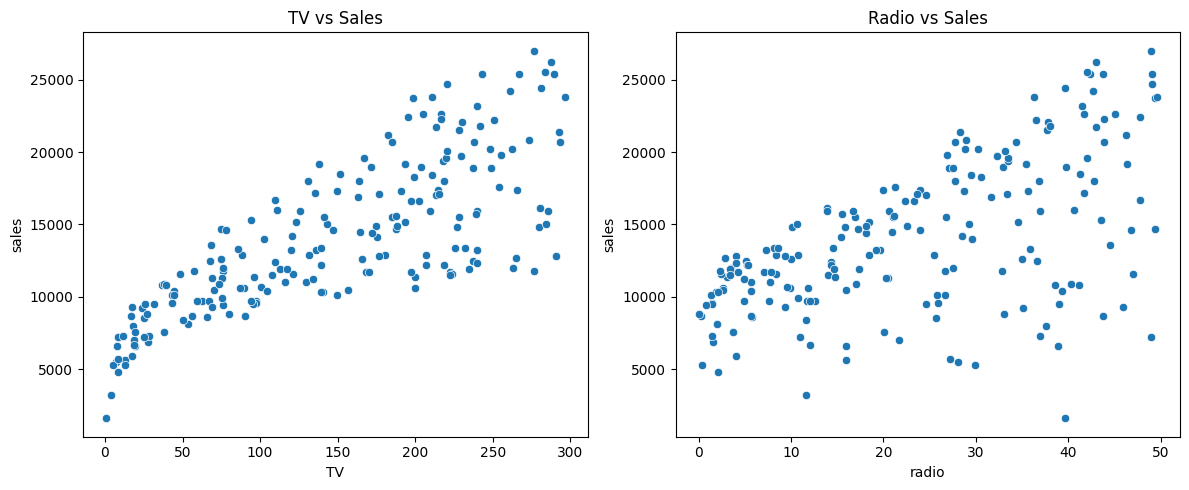

In [81]:
# Crear una figura y dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(y=df['sales'], x=df['TV'], ax=axes[0])
axes[0].set_title('TV vs Sales')

sns.scatterplot(y=df['sales'], x=df['radio'], ax=axes[1])
axes[1].set_title('Radio vs Sales')

# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura
plt.show()

## Modelado

#### 1. Regresión lineal simple.

##### 1.1 Regresión lineal simple sin estandarizar.

In [34]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [84]:
#Definimos las variables predictoras y el target
X=df[['TV','radio']]
y=df['sales']

#Dividimos el conjunto de datos
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2024)

#Entrenamiento
lineal=LinearRegression()
lineal.fit(x_train,y_train)

#predicciones
predictions=lineal.predict(x_test)

#Resultado (R2 y MAE)
print('R2 test: ', lineal.score(x_test,y_test))
print('MAE test:', metrics.mean_absolute_error(y_test, predictions)) #media de los errores en valor absoluto
print('MAPE test:', metrics.mean_absolute_percentage_error(y_test, predictions))  
print("MSE test", metrics.mean_squared_error(y_test, predictions))
print("RMSE test", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('-'*100)

predicciones_entrenamiento=lineal.predict(x_train)
print('MAE train:', metrics.mean_absolute_error(y_train, predicciones_entrenamiento)) 
print('MAPE train:', metrics.mean_absolute_percentage_error(y_train, predicciones_entrenamiento))
print("MSE train", metrics.mean_squared_error(y_train, predicciones_entrenamiento))
print("RMSE train", np.sqrt(metrics.mean_squared_error(y_train, predicciones_entrenamiento)))

R2 test:  0.8574025290876025
MAE test: 1450.7911829076254
MAPE test: 0.24632746896286073
MSE test 4264483.424504238
RMSE test 2065.0625715711953
----------------------------------------------------------------------------------------------------
MAE train: 1210.7929508668428
MAPE train: 0.11312185694714741
MSE train 2423660.46885633
RMSE train 1556.810993298907


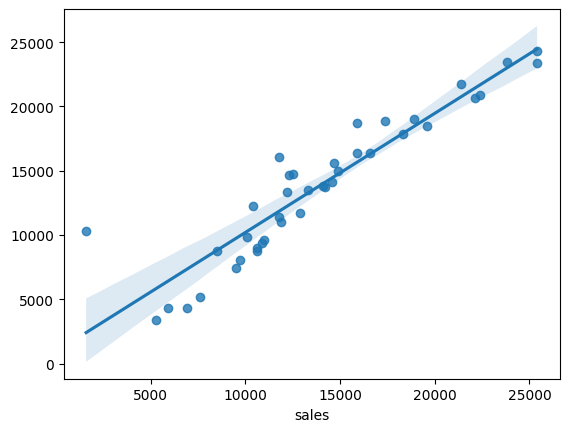

In [85]:
sns.regplot(x=y_test, y=predictions);

##### 1.2 Regresión lineal simple estandarizado.

$$X_{train_{scale}}=\dfrac{X_{train}-\mu_{train}}{\sigma_{train}}$$

$$X_{test_{scale}}=\dfrac{X_{test}-\mu_{train}}{\sigma_{train}}$$

In [91]:
#Definimos las variables predictoras y el target
X=df[['TV','radio']]
y=df['sales']

#Dividimos el conjunto de datos
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2024)

#Estandarizo las variables predictoras (tanto train como test)
std_scale=preprocessing.StandardScaler().fit(x_train)
x_train=std_scale.transform(x_train)
x_test=std_scale.transform(x_test) #MEJOR SI TRASFORMAMOS X_TEST CON EL ESCALADO DE TRAIN

#Entrenamiento
lineal=LinearRegression()
lineal.fit(x_train,y_train)

#predicciones
predictions=lineal.predict(x_test)

#Resultado (R2 y MAE)
print('R2 test: ', lineal.score(x_train,y_train))
print('MAE test:', metrics.mean_absolute_error(y_test, predictions)) #media de los errores en valor absoluto
print('MAPE test:', metrics.mean_absolute_percentage_error(y_test, predictions))  
print("MSE test", metrics.mean_squared_error(y_test, predictions))
print("RMSE test", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('-'*100)

predicciones_entrenamiento=lineal.predict(x_train)
print('MAE train:', metrics.mean_absolute_error(y_train, predicciones_entrenamiento)) 
print('MAPE train:', metrics.mean_absolute_percentage_error(y_train, predicciones_entrenamiento))
print("MSE train", metrics.mean_squared_error(y_train, predicciones_entrenamiento))
print("RMSE train", np.sqrt(metrics.mean_squared_error(y_train, predicciones_entrenamiento)))

R2 test:  0.9080841146708404
MAE test: 1450.7911829076256
MAPE test: 0.24632746896286067
MSE test 4264483.424504237
RMSE test 2065.062571571195
----------------------------------------------------------------------------------------------------
MAE train: 1210.792950866843
MAPE train: 0.11312185694714741
MSE train 2423660.46885633
RMSE train 1556.810993298907


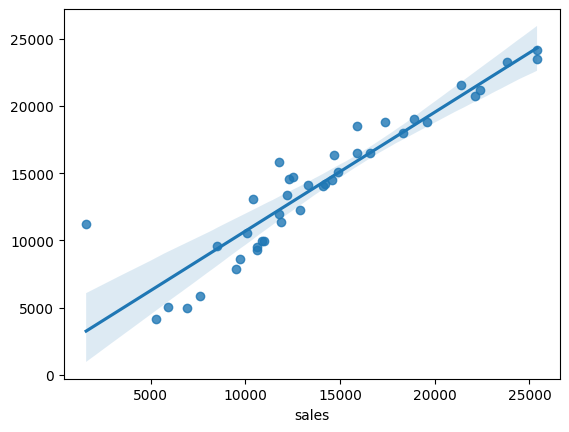

In [87]:
sns.regplot(x=y_test, y=predictions);

### 2. Regresión lineal simple + Ridge

Para saber que valor dale al alpha, vere cual de todas las opciones da un error menor en los resultados.

In [103]:
X=df[['TV','radio']]
y=df['sales']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2024)

std_scale=preprocessing.StandardScaler().fit(x_train)
x_train=std_scale.transform(x_train)
x_test=std_scale.transform(x_test)

n_alphas=100
alphas=np.logspace(-4,2,n_alphas)

coef_ridge=[]
err_ridge=[]

for a in alphas:
    ridge=Ridge(alpha=a)
    ridge.fit(x_train, y_train)

    coef_ridge.append(ridge.coef_)
    predict=ridge.predict(x_test)
    error=metrics.mean_absolute_error(predict,y_test)

    err_ridge.append(error)

In [104]:
min(err_ridge), alphas[err_ridge.index(min(err_ridge))]

(1355.7986746414633, 32.745491628777316)

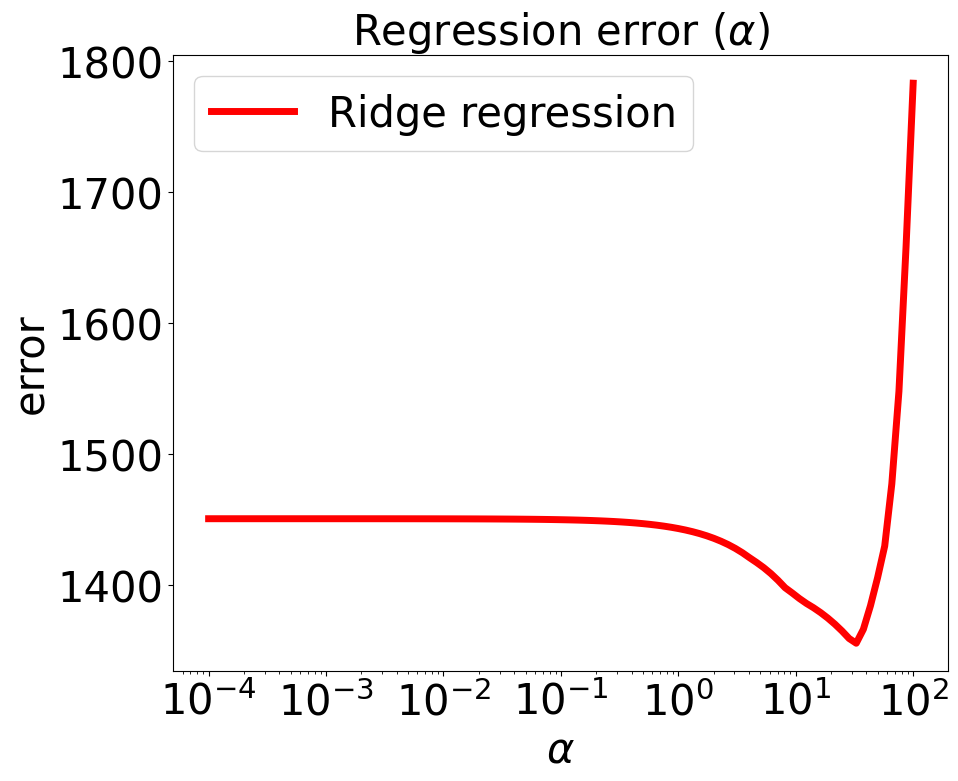

In [105]:
plt.figure(figsize=(10,8))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.set_xscale('log')
plt.xlabel('$\\alpha$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\alpha$)', fontsize=30)
plt.show()

Regresion lineal + Ridge.

In [106]:
#Entrenamiento
ridgeR=Ridge(alpha=alphas[err_ridge.index(min(err_ridge))])
ridgeR.fit(x_train,y_train)

#predicciones
predictions=ridgeR.predict(x_test)

#Resultado (R2 y MAE)
print('R2 test: ', ridgeR.score(x_train,y_train))
print('MAE test:', metrics.mean_absolute_error(y_test, predictions)) #media de los errores en valor absoluto
print('MAPE test:', metrics.mean_absolute_percentage_error(y_test, predictions))  
print("MSE test", metrics.mean_squared_error(y_test, predictions))
print("RMSE test", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('-'*100)

predicciones_entrenamiento=ridgeR.predict(x_train)
print('MAE train:', metrics.mean_absolute_error(y_train, predicciones_entrenamiento)) 
print('MAPE train:', metrics.mean_absolute_percentage_error(y_train, predicciones_entrenamiento))
print("MSE train", metrics.mean_squared_error(y_train, predicciones_entrenamiento))
print("RMSE train", np.sqrt(metrics.mean_squared_error(y_train, predicciones_entrenamiento)))

R2 test:  0.8828698742832286
MAE test: 1355.7986746414633
MAPE test: 0.2254361777991088
MSE test 4396850.0028702505
RMSE test 2096.8667108021555
----------------------------------------------------------------------------------------------------
MAE train: 1346.3317537120686
MAPE train: 0.11808940992054644
MSE train 3088515.705367972
RMSE train 1757.4173395548287


### 3. Regresión lineal simple + Lasso

In [115]:
X=df[['TV','radio']]
y=df['sales']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2024)

std_scale=preprocessing.StandardScaler().fit(x_train)
x_train=std_scale.transform(x_train)
x_test=std_scale.transform(x_test)

n_alphas=100
alphas=np.logspace(-4,3,n_alphas)

coef_lasso=[]
err_lasso=[]

for a in alphas:
    lassoR=Lasso(alpha=a)
    lassoR.fit(x_train, y_train)

    coef_lasso.append(lassoR.coef_)
    predict=lassoR.predict(x_test)
    error=metrics.mean_absolute_error(predict,y_test)

    err_lasso.append(error)

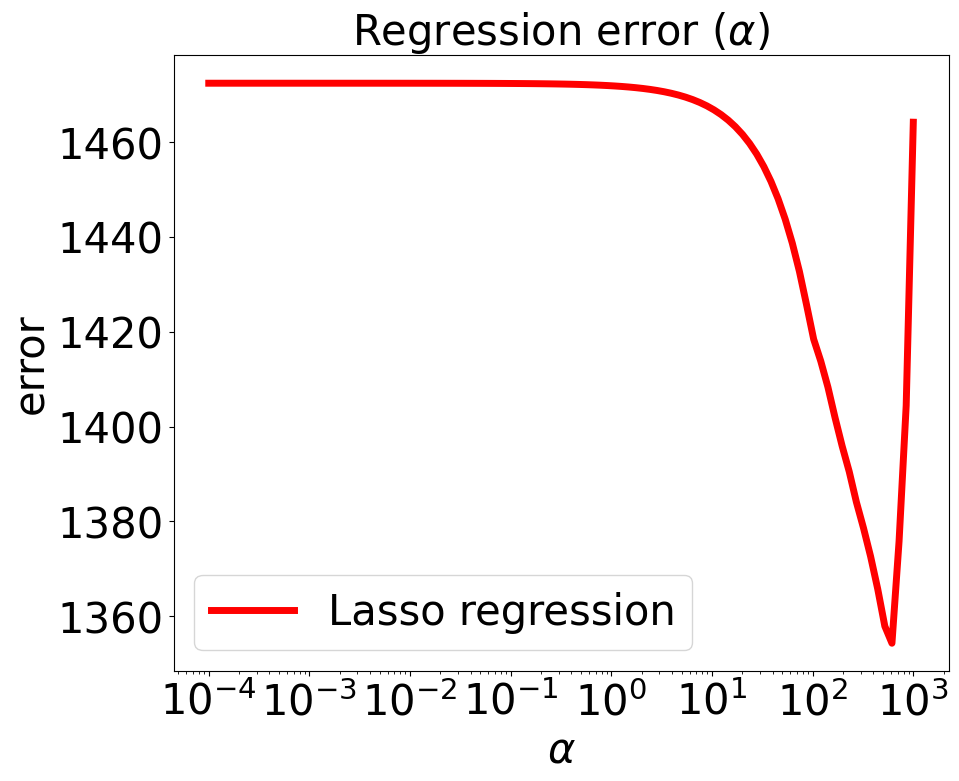

In [116]:
plt.figure(figsize=(10,8))
ax = plt.gca()
ax.plot(alphas, err_lasso, linewidth=5, color='red', label="Lasso regression")
ax.set_xscale('log')
plt.xlabel('$\\alpha$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\alpha$)', fontsize=30)
plt.show()

In [117]:
#Entrenamiento
lassoR=Lasso(alpha=alphas[err_lasso.index(min(err_lasso))])
lassoR.fit(x_train,y_train)

#predicciones
predictions=lassoR.predict(x_test)

#Resultado (R2 y MAE)
print('R2 test: ', lassoR.score(x_train,y_train))
print('MAE test:', metrics.mean_absolute_error(y_test, predictions)) #media de los errores en valor absoluto
print('MAPE test:', metrics.mean_absolute_percentage_error(y_test, predictions))  
print("MSE test", metrics.mean_squared_error(y_test, predictions))
print("RMSE test", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('-'*100)

predicciones_entrenamiento=lassoR.predict(x_train)
print('MAE train:', metrics.mean_absolute_error(y_train, predicciones_entrenamiento)) 
print('MAPE train:', metrics.mean_absolute_percentage_error(y_train, predicciones_entrenamiento))
print("MSE train", metrics.mean_squared_error(y_train, predicciones_entrenamiento))
print("RMSE train", np.sqrt(metrics.mean_squared_error(y_train, predicciones_entrenamiento)))

R2 test:  0.8802190723567014
MAE test: 1354.3287533732794
MAPE test: 0.22067211593681316
MSE test 4450389.451608459
RMSE test 2109.5946178373842
----------------------------------------------------------------------------------------------------
MAE train: 1365.3252247643682
MAPE train: 0.11768013463311341
MSE train 3158412.696699611
RMSE train 1777.1923634484847


### 4. Regresión lineal simple + Elastic net

In [137]:
X=df[['TV','radio']]
y=df['sales']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2024)

std_scale=preprocessing.StandardScaler().fit(x_train)
x_train=std_scale.transform(x_train)
x_test=std_scale.transform(x_test)

n_alphas=100
alphas=np.logspace(-2,5,n_alphas)

coef_elastic=[]
err_elastic=[]

for a in alphas:
    elasticR=ElasticNet(alpha=a, l1_ratio=0.4)
    elasticR.fit(x_train, y_train)

    coef_elastic.append(elasticR.coef_)
    predict=elasticR.predict(x_test)
    error=metrics.mean_absolute_error(predict,y_test)

    err_elastic.append(error)

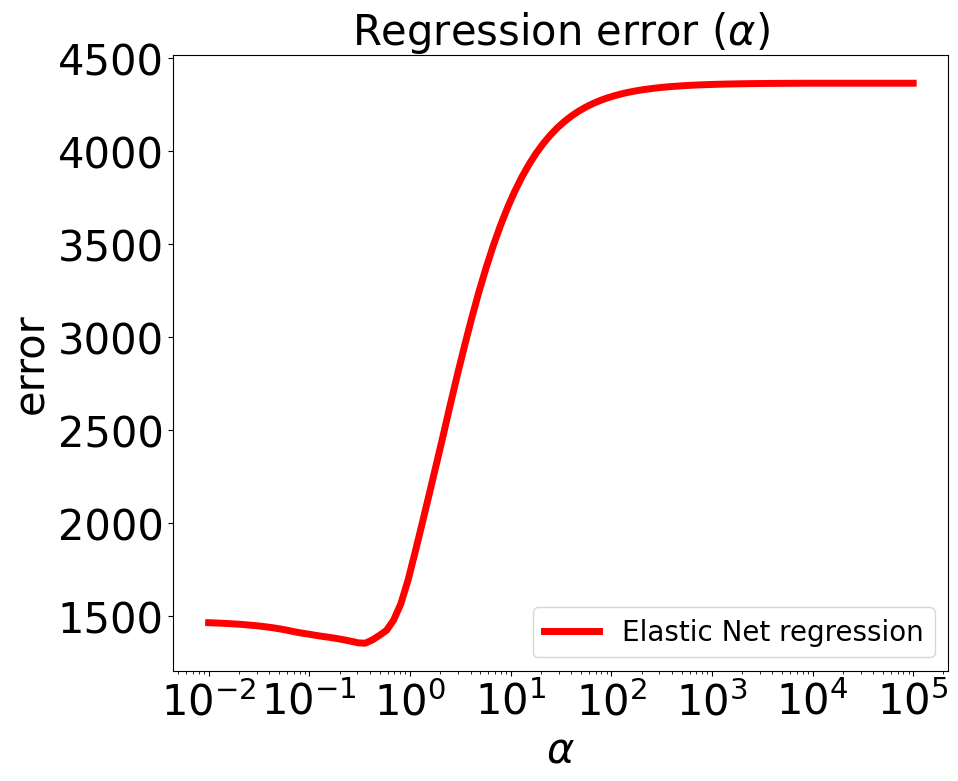

In [123]:
plt.figure(figsize=(10,8))
ax = plt.gca()
ax.plot(alphas, err_elastic, linewidth=5, color='red', label="Elastic Net regression")
ax.set_xscale('log')
plt.xlabel('$\\alpha$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=20)
plt.title(r'Regression error ($\alpha$)', fontsize=30)
plt.show()

#La grafica se parece mas a ridge. Por lo tanto le dare mas peso a ridge (L2).

In [63]:
#Entrenamiento
elasticR=ElasticNet(alpha=alphas[err_elastic.index(min(err_elastic))], l1_ratio=0.4)
elasticR.fit(x_train, y_train)

#predicciones
predictions=elasticR.predict(x_test)

#Resultado (R2 y MAE)
print('R2 test: ', elasticR.score(x_train,y_train))
print('MAE test:', metrics.mean_absolute_error(y_test, predictions)) #media de los errores en valor absoluto
print('MAPE test:', metrics.mean_absolute_percentage_error(y_test, predictions))  
print("MSE test", metrics.mean_squared_error(y_test, predictions))
print("RMSE test", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('-'*100)

predicciones_entrenamiento=elasticR.predict(x_train)
print('MAE train:', metrics.mean_absolute_error(y_train, predicciones_entrenamiento)) 
print('MAPE train:', metrics.mean_absolute_percentage_error(y_train, predicciones_entrenamiento))
print("MSE train", metrics.mean_squared_error(y_train, predicciones_entrenamiento))
print("RMSE train", np.sqrt(metrics.mean_squared_error(y_train, predicciones_entrenamiento)))

R2 test:  0.8557262879012506
MAE test: 1310.5277444870142
MAPE test: 0.24007260026080432
MSE test 4314612.663886475
RMSE test 2077.164573134848
----------------------------------------------------------------------------------------------------
MAE train: 1220.1404297729255
MAPE train: 0.11185966729312798
MSE train 2463302.7079451107
RMSE train 1569.491225826099


> Existe un metodo que prueba todos los posibles combinaciones de r-s y alphas y podemos obtener el mejor
>
> from aklearn.model_selection import GridSearchCV. Se usa validación cruzada.


In [127]:
from sklearn.model_selection import GridSearchCV

parameters={'alpha': np.logspace(-2,5,50),
            'l1_ratio':np.arange(0,1,0.05)}

elastic_gs=GridSearchCV(elasticR, parameters, cv=5, scoring='neg_mean_absolute_error') #cojemos negativo poruqe el gridsearch intenta maximizar el scoring. Por lo tanto cogiendolo en negativo lo  intentara acercar mas a 0.
elastic_gs.fit(x_train, y_train)

c:\Users\Bridgeschool37\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.455e+08, tolerance: 3.220e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Bridgeschool37\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.778e+08, tolerance: 3.472e+05 Linear regression models with null weight for the l1 regularization term are

GridSearchCV(cv=5, estimator=ElasticNet(alpha=100000.0, l1_ratio=0.4),
             param_grid={'alpha': array([1.00000000e-02, 1.38949549e-02, 1.93069773e-02, 2.68269580e-02,
       3.72759372e-02, 5.17947468e-02, 7.19685673e-02, 1.00000000e-01,
       1.38949549e-01, 1.93069773e-01, 2.68269580e-01, 3.72759372e-01,
       5.17947468e-01, 7.19685673e-01, 1.00000000e+00, 1.38949549e+00,
       1.93069773e+00,...
       1.38949549e+03, 1.93069773e+03, 2.68269580e+03, 3.72759372e+03,
       5.17947468e+03, 7.19685673e+03, 1.00000000e+04, 1.38949549e+04,
       1.93069773e+04, 2.68269580e+04, 3.72759372e+04, 5.17947468e+04,
       7.19685673e+04, 1.00000000e+05]),
                         'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             scoring='neg_mean_absolute_error')

Despues de analizar todos los escenarios nos devuelve el mejor scenario

In [128]:
elastic_gs.best_params_

{'alpha': 0.01, 'l1_ratio': 0.7000000000000001}

In [129]:
elastic_gs.best_estimator_

ElasticNet(alpha=0.01, l1_ratio=0.7000000000000001)

In [130]:
elastic_gs.best_score_

-1228.6826430565645

Probamos con los mejores resultados

In [138]:
#Entrenamiento
elasticR=ElasticNet(alpha=0.01, l1_ratio=0.7)
elasticR.fit(x_train, y_train)

#predicciones
predictions=elasticR.predict(x_test)

#Resultado (R2 y MAE)
print('R2 test: ', elasticR.score(x_train,y_train))
print('MAE test:', metrics.mean_absolute_error(y_test, predictions)) #media de los errores en valor absoluto
print('MAPE test:', metrics.mean_absolute_percentage_error(y_test, predictions))  
print("MSE test", metrics.mean_squared_error(y_test, predictions))
print("RMSE test", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('-'*100)

predicciones_entrenamiento=elasticR.predict(x_train)
print('MAE train:', metrics.mean_absolute_error(y_train, predicciones_entrenamiento)) 
print('MAPE train:', metrics.mean_absolute_percentage_error(y_train, predicciones_entrenamiento))
print("MSE train", metrics.mean_squared_error(y_train, predicciones_entrenamiento))
print("RMSE train", np.sqrt(metrics.mean_squared_error(y_train, predicciones_entrenamiento)))

R2 test:  0.9080763485127504
MAE test: 1447.1769528427824
MAPE test: 0.24584081943355235
MSE test 4252488.052117306
RMSE test 2062.1561657928105
----------------------------------------------------------------------------------------------------
MAE train: 1211.3555258166498
MAPE train: 0.11304878333455597
MSE train 2423865.248805846
RMSE train 1556.8767609563213


### 5. Regresión polinomica de grado 2

In [139]:
X=df[['TV','radio']]
y=df['sales']

#Convertimos los datos X y calculamos los coeficientes polinomiales
polinomial=PolynomialFeatures(degree=2)
polinomial.fit(X)
X=polinomial.transform(X)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2024)

#Entrenamiento
polR=LinearRegression()
polR.fit(x_train,y_train)

#Predicciones
predictions=polR.predict(x_test)

#Resultado (R2 y MAE)
print('R2 test: ', polR.score(x_train,y_train))
print('MAE test:', metrics.mean_absolute_error(y_test, predictions)) #media de los errores en valor absoluto
print('MAPE test:', metrics.mean_absolute_percentage_error(y_test, predictions))  
print("MSE test", metrics.mean_squared_error(y_test, predictions))
print("RMSE test", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('-'*100)

predicciones_entrenamiento=polR.predict(x_train)
print('MAE train:', metrics.mean_absolute_error(y_train, predicciones_entrenamiento)) 
print('MAPE train:', metrics.mean_absolute_percentage_error(y_train, predicciones_entrenamiento))
print("MSE train", metrics.mean_squared_error(y_train, predicciones_entrenamiento))
print("RMSE train", np.sqrt(metrics.mean_squared_error(y_train, predicciones_entrenamiento)))

R2 test:  0.9896680766720283
MAE test: 423.79961793243217
MAPE test: 0.10811066427359246
MSE test 838375.303143174
RMSE test 915.6283651914537
----------------------------------------------------------------------------------------------------
MAE train: 403.7477853039398
MAPE train: 0.040228019581220006
MSE train 272434.67271826917
RMSE train 521.9527495073372


### 6. Regresión polinomica de grado 3

In [140]:
X=df[['TV','radio']]
y=df['sales']

#Convertimos los datos X y calculamos los coeficientes polinomiales
polinomial=PolynomialFeatures(degree=3)
polinomial.fit(X)
X=polinomial.transform(X)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2024)

#Entrenamiento
polR=LinearRegression()
polR.fit(x_train,y_train)

#Predicciones
predictions=polR.predict(x_test)

#Resultado (R2 y MAE)
print('R2 test: ', polR.score(x_train,y_train))
print('MAE test:', metrics.mean_absolute_error(y_test, predictions)) #media de los errores en valor absoluto
print('MAPE test:', metrics.mean_absolute_percentage_error(y_test, predictions))  
print("MSE test", metrics.mean_squared_error(y_test, predictions))
print("RMSE test", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('-'*100)

predicciones_entrenamiento=polR.predict(x_train)
print('MAE train:', metrics.mean_absolute_error(y_train, predicciones_entrenamiento)) 
print('MAPE train:', metrics.mean_absolute_percentage_error(y_train, predicciones_entrenamiento))
print("MSE train", metrics.mean_squared_error(y_train, predicciones_entrenamiento))
print("RMSE train", np.sqrt(metrics.mean_squared_error(y_train, predicciones_entrenamiento)))

R2 test:  0.9940220478685345
MAE test: 382.0502420068028
MAPE test: 0.09251801848491405
MSE test 629665.0297399361
RMSE test 793.5143538335876
----------------------------------------------------------------------------------------------------
MAE train: 302.60662714966145
MAPE train: 0.02882006190020022
MSE train 157628.09892831362
RMSE train 397.02405333721737


### 7. Regresión polinomica de grado 4

In [141]:
X=df[['TV','radio']]
y=df['sales']

#Convertimos los datos X y calculamos los coeficientes polinomiales
polinomial=PolynomialFeatures(degree=4)
polinomial.fit(X)
X=polinomial.transform(X)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2024)

#Entrenamiento
polR=LinearRegression()
polR.fit(x_train,y_train)

#Predicciones
predictions=polR.predict(x_test)

#Resultado (R2 y MAE)
print('R2 test: ', polR.score(x_train,y_train))
print('MAE test:', metrics.mean_absolute_error(y_test, predictions)) #media de los errores en valor absoluto
print('MAPE test:', metrics.mean_absolute_percentage_error(y_test, predictions))  
print("MSE test", metrics.mean_squared_error(y_test, predictions))
print("RMSE test", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('-'*100)

predicciones_entrenamiento=polR.predict(x_train)
print('MAE train:', metrics.mean_absolute_error(y_train, predicciones_entrenamiento)) 
print('MAPE train:', metrics.mean_absolute_percentage_error(y_train, predicciones_entrenamiento))
print("MSE train", metrics.mean_squared_error(y_train, predicciones_entrenamiento))
print("RMSE train", np.sqrt(metrics.mean_squared_error(y_train, predicciones_entrenamiento)))

R2 test:  0.9955736312483766
MAE test: 351.3899301840509
MAPE test: 0.08609587229267437
MSE test 543487.9641543663
RMSE test 737.2163618330553
----------------------------------------------------------------------------------------------------
MAE train: 266.04208844265264
MAPE train: 0.024133389837364606
MSE train 116715.57017018858
RMSE train 341.636605430666


### 8. Regresión polinomica de grado 5

In [142]:
X=df[['TV','radio']]
y=df['sales']

#Convertimos los datos X y calculamos los coeficientes polinomiales
polinomial=PolynomialFeatures(degree=5)
polinomial.fit(X)
X=polinomial.transform(X)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2024)

#Entrenamiento
polR=LinearRegression()
polR.fit(x_train,y_train)

#Predicciones
predictions=polR.predict(x_test)

#Resultado (R2 y MAE)
print('R2 test: ', polR.score(x_train,y_train))
print('MAE test:', metrics.mean_absolute_error(y_test, predictions)) #media de los errores en valor absoluto
print('MAPE test:', metrics.mean_absolute_percentage_error(y_test, predictions))  
print("MSE test", metrics.mean_squared_error(y_test, predictions))
print("RMSE test", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('-'*100)

predicciones_entrenamiento=polR.predict(x_train)
print('MAE train:', metrics.mean_absolute_error(y_train, predicciones_entrenamiento)) 
print('MAPE train:', metrics.mean_absolute_percentage_error(y_train, predicciones_entrenamiento))
print("MSE train", metrics.mean_squared_error(y_train, predicciones_entrenamiento))
print("RMSE train", np.sqrt(metrics.mean_squared_error(y_train, predicciones_entrenamiento)))

R2 test:  0.9963080579827126
MAE test: 322.93143056335276
MAPE test: 0.0804650135824767
MSE test 487501.15136439435
RMSE test 698.2128266971284
----------------------------------------------------------------------------------------------------
MAE train: 244.8651051155879
MAPE train: 0.02115954791373705
MSE train 97350.02702270079
RMSE train 312.00965854072655


### 9. Regresión polinomica de grado 6

In [143]:
X=df[['TV','radio']]
y=df['sales']

#Convertimos los datos X y calculamos los coeficientes polinomiales
polinomial=PolynomialFeatures(degree=6)
polinomial.fit(X)
X=polinomial.transform(X)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2024)

#Entrenamiento
polR=LinearRegression()
polR.fit(x_train,y_train)

#Predicciones
predictions=polR.predict(x_test)

#Resultado (R2 y MAE)
print('R2 test: ', polR.score(x_train,y_train))
print('MAE test:', metrics.mean_absolute_error(y_test, predictions)) #media de los errores en valor absoluto
print('MAPE test:', metrics.mean_absolute_percentage_error(y_test, predictions))  
print("MSE test", metrics.mean_squared_error(y_test, predictions))
print("RMSE test", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('-'*100)

predicciones_entrenamiento=polR.predict(x_train)
print('MAE train:', metrics.mean_absolute_error(y_train, predicciones_entrenamiento)) 
print('MAPE train:', metrics.mean_absolute_percentage_error(y_train, predicciones_entrenamiento))
print("MSE train", metrics.mean_squared_error(y_train, predicciones_entrenamiento))
print("RMSE train", np.sqrt(metrics.mean_squared_error(y_train, predicciones_entrenamiento)))

R2 test:  0.9941136757004742
MAE test: 419.2792510299373
MAPE test: 0.09979819004481501
MSE test 800925.5359706695
RMSE test 894.9444317781241
----------------------------------------------------------------------------------------------------
MAE train: 313.6422702115187
MAPE train: 0.026680343124604468
MSE train 155212.03392144493
RMSE train 393.96958502077916


# MIRAR A PARTIR DE ESTE PUNTO:

### 10. Regresión polinomica de grado 5 + LASSO

In [145]:
X=df[['TV','radio']]
y=df['sales']

polinomial=PolynomialFeatures(degree=5)
polinomial.fit(X)
x=polinomial.transform(X)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2024)


#Construimos el modelo LASSO con el alpha que de menor error
lassoR=Lasso(alpha=50)
lassoR.fit(x_train,y_train)

#predicciones
predictions=lassoR.predict(x_test)

#Resultado (R2 y MAE)
print('R2 test: ', lassoR.score(x_train,y_train))
print('MAE test:', metrics.mean_absolute_error(y_test, predictions)) #media de los errores en valor absoluto
print('MAPE test:', metrics.mean_absolute_percentage_error(y_test, predictions))  
print("MSE test", metrics.mean_squared_error(y_test, predictions))
print("RMSE test", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('-'*100)

predicciones_entrenamiento=lassoR.predict(x_train)
print('MAE train:', metrics.mean_absolute_error(y_train, predicciones_entrenamiento)) 
print('MAPE train:', metrics.mean_absolute_percentage_error(y_train, predicciones_entrenamiento))
print("MSE train", metrics.mean_squared_error(y_train, predicciones_entrenamiento))
print("RMSE train", np.sqrt(metrics.mean_squared_error(y_train, predicciones_entrenamiento)))

R2 test:  0.9080836749249147
MAE test: 1450.4679219890097
MAPE test: 0.24618690323262343
MSE test 4262611.779069214
RMSE test 2064.6093526546892
----------------------------------------------------------------------------------------------------
MAE train: 1211.0159935705024
MAPE train: 0.11308655123858395
MSE train 2423672.064184085
RMSE train 1556.814717358519


In [144]:
X=df[['TV','radio']]
y=df['sales']

polinomial=PolynomialFeatures(degree=5)
polinomial.fit(X)
x=polinomial.transform(X)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2024)

n_alphas=100
alphas=np.logspace(-5,5,n_alphas)

coef_lasso=[]
err_lasso=[]

for a in alphas:
    lassoR=Lasso(alpha=a)
    lassoR.fit(x_train, y_train)

    coef_lasso.append(lassoR.coef_)
    predict=lassoR.predict(x_test)
    error=metrics.mean_squared_error(predict,y_test)

    err_lasso.append(error)

#Construimos el modelo LASSO con el alpha que de menor error
lassoR=Lasso(alpha=alphas[err_lasso.index(min(err_lasso))])
lassoR.fit(x_train,y_train)

#predicciones
predictions=lassoR.predict(x_test)

#Resultado (R2 y MAE)
print('R2 test: ', lassoR.score(x_train,y_train))
print('MAE test:', metrics.mean_absolute_error(y_test, predictions)) #media de los errores en valor absoluto
print('MAPE test:', metrics.mean_absolute_percentage_error(y_test, predictions))  
print("MSE test", metrics.mean_squared_error(y_test, predictions))
print("RMSE test", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('-'*100)

predicciones_entrenamiento=lassoR.predict(x_train)
print('MAE train:', metrics.mean_absolute_error(y_train, predicciones_entrenamiento)) 
print('MAPE train:', metrics.mean_absolute_percentage_error(y_train, predicciones_entrenamiento))
print("MSE train", metrics.mean_squared_error(y_train, predicciones_entrenamiento))
print("RMSE train", np.sqrt(metrics.mean_squared_error(y_train, predicciones_entrenamiento)))

R2 test:  0.9054720736437419
MAE test: 1425.8767244700168
MAPE test: 0.23549396149160912
MSE test 4189915.177850379
RMSE test 2046.9282297751377
----------------------------------------------------------------------------------------------------
MAE train: 1237.839512665259
MAPE train: 0.11116018155817678
MSE train 2492535.4033438615
RMSE train 1578.7765526963788


1. REGRESIÓN LINEAL:
- R2 test:  0.8532857127136598
- MAE test: 1354.8876032310347
- MAPE test: 0.2483413637970065
- MSE test 4387599.880049171
- RMSE test 2094.6598482925983

- MAE train: 1199.8284783053418
- MAPE train: 0.11211535469543658
- MSE train 2402717.7765596863
- RMSE train 1550.0702489112184


2. REGRESIÓN LINEAL + RIDGE
R2 test:  0.8557186094867586
MAE test: 1308.6161590435743
MAPE test: 0.23946911407851953
MSE test 4314842.292582678
RMSE test 2077.219846954741

MAE train: 1223.027437852725
MAPE train: 0.11192041713926622
MSE train 2474123.8793185363
RMSE train 1572.9347981777682


3. REGRESIÓN LINEAL + LASSO
R2 test:  0.8595333543669977 #MEJOR PUNTUACION R2
MAE test: 1294.7749414903058
MAPE test: 0.23808531743121794
MSE test 4200759.509722622
RMSE test 2049.57544621383

MAE train: 1220.1207551602001
MAPE train: 0.11219363094913974
MSE train 2450687.441231028
RMSE train 1565.467163894225

4. REGRESIÓN LINEAL + ELASTIC
R2 test:  0.8557262879012506 
MAE test: 1310.5277444870142
MAPE test: 0.24007260026080432
MSE test 4314612.663886475
RMSE test 2077.164573134848

MAE train: 1220.1404297729255
MAPE train: 0.11185966729312798
MSE train 2463302.7079451107
RMSE train 1569.491225826099

5. REGRESION POLINOMICA DE GRADO 2
R2 test:  0.9724779922404342
MAE test: 425.61055674283597
MAPE test: 0.1073658216415779
MSE test 823066.1115430875
RMSE test 907.2299110716575

MAE train: 401.21057572987314
MAPE train: 0.039947342981697935
MSE train 270897.6228247845
RMSE train 520.4782635468887

6. regresion polinomica de grado 3
R2 test:  0.9796550997696147
MAE test: 389.58565510362047
MAPE test: 0.09009518841395836
MSE test 608429.372909219
RMSE test 780.0188285607079

MAE train: 293.62886384169366
MAPE train: 0.02769589705387801
MSE train 149372.02490951412
RMSE train 386.4867719722295

7. REGRESION POLINOMICA DE GRADO 4
R2 test:  0.9715637480617583
MAE test: 631.239763077721
MAPE test: 0.09569620289268828
MSE test 850407.2636754976
RMSE test 922.1752890180356

MAE train: 667.5779781091027
MAPE train: 0.05403518992464627
MSE train 696864.8594476589
RMSE train 834.7843191194112

8. REGRESION POLINOMICA DE GRADO 5
R2 test:  0.9475943745769467
MAE test: 640.2235467997809
MAPE test: 0.06552464636288056
MSE test 1567229.2049603174
RMSE test 1251.8902527619255

MAE train: 331.6752088348495
MAPE train: 0.029396890377085056
MSE train 208373.30768830352
RMSE train 456.47925219915913

9. REGRESION POLINOMICA DE GRADO 6
R2 test:  0.9818865605851304
MAE test: 464.1976443412835
MAPE test: 0.06163805706350861
MSE test 541695.8775722404
RMSE test 735.999916828963

MAE train: 166.12325381864179
MAPE train: 0.013153565308279344
MSE train 48667.74317294163
RMSE train 220.60766798309987

10. REGRESION POLINOMIAL 5 + LASSO
R2 test:  0.8595333543669977
MAE test: 1294.7749414903058
MAPE test: 0.23808531743121794
MSE test 4200759.509722622
RMSE test 2049.57544621383
----------------------------------------------------------------------------------------------------
MAE train: 1220.1207551602001
MAPE train: 0.11219363094913974
MSE train 2450687.441231028
RMSE train 1565.467163894225


## Resultados

# Modelos entrenados:
1. Regresión lineal . MAE = ...
2. LR + Ridge
3. LR + Lasso
4. LR + Elastic
5. PR 2
6. PR 3
7. PR 4
8. PR 5
9. PR 6
10. El mejor modelo (PR 5) + Lasso. El modelo con menores errores en test, es decir, el que mejor generaliza ante nuevos datos.